<a href="https://colab.research.google.com/github/Deepking1996/ADS-506_Group_3_Final_Team_Project-/blob/main/ADS_506_Final_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the rpy2.ipython extension to enable R execution
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# Load the rpy2.ipython extension to enable R execution (if not already loaded)
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library(dplyr)
library(ggplot2)
library(scales)

Now, let's load the provided CSV file into an R data frame.

In [ ]:
%%R
# Read the CSV file into an R data frame
mental_health_data <- read.csv("Mental Health dataset1.csv")

# Display the first few rows of the data frame
print(head(mental_health_data))

# Optionally, display the structure of the data
print(str(mental_health_data))

  Gender Country Occupation SelfEmployed FamilyHistory Treatment
1 Female      UK     Others           No           Yes        No
2 Female     USA  Housewife           No           Yes        No
3 Female  Canada     Others           No            No       Yes
4 Female  Canada  Corporate           No           Yes       Yes
5 Female      UK  Corporate           No            No       Yes
6 Female     USA    Student           No            No        No
         DaysIndoors HabitsChange MentalHealthHistory IncreasingStress
1         15-30 days           No                 Yes              Yes
2         15-30 days        Maybe               Maybe              Yes
3 More than 2 months        Maybe                  No               No
4   Go out Every day           No               Maybe               No
5 More than 2 months          Yes                  No            Maybe
6   Go out Every day          Yes                 Yes              Yes
  MoodSwings SocialWeakness CopingStruggles Work

# Task
Perform a comprehensive data preparation, cleaning, and exploratory data analysis (EDA) on the `mental_health_data` R data frame. The analysis should include an initial data overview and quality check, identification and handling of missing values and outliers, appropriate data type conversions and transformations, rigorous EDA with plots for distributions and relationships between variables, and a final summary discussing data quality, challenges, and readiness for further analysis.

## Initial Data Overview and Data Quality Check


In [ ]:
%%R
# Get the number of rows and columns
print("Dimensions of the data frame:")
print(dim(mental_health_data))

# List all column names
print("Column names:")
print(colnames(mental_health_data))

# Get a statistical summary of each column
print("Statistical summary of each column:")
print(summary(mental_health_data))

# Display the structure of the data frame (already done in previous cell, but re-confirming as per instructions)
print("Structure of the data frame:")
print(str(mental_health_data))

[1] "Dimensions of the data frame:"
[1] 261328     17
[1] "Column names:"
 [1] "Gender"                "Country"               "Occupation"           
 [4] "SelfEmployed"          "FamilyHistory"         "Treatment"            
 [7] "DaysIndoors"           "HabitsChange"          "MentalHealthHistory"  
[10] "IncreasingStress"      "MoodSwings"            "SocialWeakness"       
[13] "CopingStruggles"       "WorkInterest"          "SocialWeakness.1"     
[16] "MentalHealthInterview" "CareOptions"          
[1] "Statistical summary of each column:"
    Gender            Country           Occupation        SelfEmployed      
 Length:261328      Length:261328      Length:261328      Length:261328     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 FamilyHistory       Treatment         DaysIndoors        HabitsChange      
 Length:261328      Length:261328      Length:261328      Len

## Handle Missing Values


In [ ]:
%%R

# 1. Calculate total number of missing values (NA) for each column
missing_values_count <- colSums(is.na(mental_health_data))

# 2. Calculate the percentage of missing values for each column
missing_values_percentage <- (missing_values_count / nrow(mental_health_data)) * 100

# Combine counts and percentages into a data frame for better readability
missing_info <- data.frame(
  Column = names(missing_values_count),
  NACount = missing_values_count,
  NAPercentage = missing_values_percentage
)

# Sort by percentage in descending order to easily see columns with most missing data
missing_info <- missing_info[order(-missing_info$NAPercentage), ]

# 3. Print the number and percentage of missing values for all columns
print("Missing Values (NA) Count and Percentage per Column:")
print(missing_info)

# 4. Additionally, inspect unique values for each character column to identify any non-standard representations of missing data
# Define common non-standard missing value representations
non_standard_missing_indicators <- c("", " ", "Unknown", "unknown", "N/A", "n/a", "Not applicable", "not applicable", "-", "(NA)")

print("\nInspecting character columns for non-standard missing values:")
for (col_name in names(mental_health_data)) {
  if (is.character(mental_health_data[[col_name]])) {
    unique_vals <- unique(mental_health_data[[col_name]])
    # Check if any non-standard indicators are present in the unique values
    found_indicators <- intersect(unique_vals, non_standard_missing_indicators)
    if (length(found_indicators) > 0) {
      cat(sprintf("Column '%s' contains non-standard missing indicators: %s\n", col_name, paste(found_indicators, collapse = ", ")))
    }
  }
}

[1] "Missing Values (NA) Count and Percentage per Column:"
                                     Column NACount NAPercentage
Gender                               Gender       0            0
Country                             Country       0            0
Occupation                       Occupation       0            0
SelfEmployed                   SelfEmployed       0            0
FamilyHistory                 FamilyHistory       0            0
Treatment                         Treatment       0            0
DaysIndoors                     DaysIndoors       0            0
HabitsChange                   HabitsChange       0            0
MentalHealthHistory     MentalHealthHistory       0            0
IncreasingStress           IncreasingStress       0            0
MoodSwings                       MoodSwings       0            0
SocialWeakness               SocialWeakness       0            0
CopingStruggles             CopingStruggles       0            0
WorkInterest                   

In [ ]:
%%R

# Replace empty strings in 'SelfEmployed' with NA
mental_health_data$SelfEmployed[mental_health_data$SelfEmployed == ""] <- NA

# Re-calculate total number of missing values (NA) for each column
missing_values_count_updated <- colSums(is.na(mental_health_data))

# Re-calculate the percentage of missing values for each column
missing_values_percentage_updated <- (missing_values_count_updated / nrow(mental_health_data)) * 100

# Combine counts and percentages into a data frame for better readability
missing_info_updated <- data.frame(
  Column = names(missing_values_count_updated),
  NACount = missing_values_count_updated,
  NAPercentage = missing_values_percentage_updated
)

# Sort by percentage in descending order
missing_info_updated <- missing_info_updated[order(-missing_info_updated$NAPercentage), ]

# Print the updated missing values information
print("Updated Missing Values (NA) Count and Percentage per Column after handling non-standard indicators:")
print(missing_info_updated)


[1] "Updated Missing Values (NA) Count and Percentage per Column after handling non-standard indicators:"
                                     Column NACount NAPercentage
SelfEmployed                   SelfEmployed    4356     1.666871
Gender                               Gender       0     0.000000
Country                             Country       0     0.000000
Occupation                       Occupation       0     0.000000
FamilyHistory                 FamilyHistory       0     0.000000
Treatment                         Treatment       0     0.000000
DaysIndoors                     DaysIndoors       0     0.000000
HabitsChange                   HabitsChange       0     0.000000
MentalHealthHistory     MentalHealthHistory       0     0.000000
IncreasingStress           IncreasingStress       0     0.000000
MoodSwings                       MoodSwings       0     0.000000
SocialWeakness               SocialWeakness       0     0.000000
CopingStruggles             CopingStruggles      

## Identify and Address Outliers


In [ ]:
%%R

# 1. Calculate the mode of the 'SelfEmployed' column
# For character vectors, the mode is the most frequent category.
# First, get the frequencies of each unique value, excluding NAs.
freq_table <- table(mental_health_data$SelfEmployed[!is.na(mental_health_data$SelfEmployed)])

# Get the value with the highest frequency
mode_selfemployed <- names(freq_table)[which.max(freq_table)]

cat(sprintf("Mode of 'SelfEmployed' column: %s\n", mode_selfemployed))

# 2. Replace NA values in the 'SelfEmployed' column with the calculated mode
mental_health_data$SelfEmployed[is.na(mental_health_data$SelfEmployed)] <- mode_selfemployed

# 3. Print the unique values and their counts for the 'SelfEmployed' column to confirm the imputation
print("Unique values and counts for 'SelfEmployed' after imputation:")
print(table(mental_health_data$SelfEmployed))

Mode of 'SelfEmployed' column: No
[1] "Unique values and counts for 'SelfEmployed' after imputation:"

    No    Yes 
234760  26568 


## Data Type Conversion and Transformation

In [ ]:
%%R

# Check if 'SocialWeakness' and 'SocialWeakness.1' are identical
if (all(mental_health_data$SocialWeakness == mental_health_data$SocialWeakness.1)) {
  cat("Columns 'SocialWeakness' and 'SocialWeakness.1' are identical. Removing 'SocialWeakness.1'.\n")
  mental_health_data <- subset(mental_health_data, select = -c(SocialWeakness.1))
} else {
  cat("Columns 'SocialWeakness' and 'SocialWeakness.1' are not identical.\n")
}

# Convert 'DaysIndoors' to an ordered factor
days_indoors_levels <- c("Go out Every day", "1-14 days", "15-30 days", "31-60 days", "More than 2 months")
mental_health_data$DaysIndoors <- factor(mental_health_data$DaysIndoors, levels = days_indoors_levels, ordered = TRUE)

# Convert 'MoodSwings' to an ordered factor
mood_swings_levels <- c("Low", "Medium", "High")
mental_health_data$MoodSwings <- factor(mental_health_data$MoodSwings, levels = mood_swings_levels, ordered = TRUE)

# Convert remaining character columns to unordered factors
for (col_name in names(mental_health_data)) {
  if (is.character(mental_health_data[[col_name]])) {
    mental_health_data[[col_name]] <- as.factor(mental_health_data[[col_name]])
  }
}

# Print the structure of the data frame to confirm changes
print(str(mental_health_data))

Columns 'SocialWeakness' and 'SocialWeakness.1' are identical. Removing 'SocialWeakness.1'.
'data.frame':	261328 obs. of  16 variables:
 $ Gender               : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ Country              : Factor w/ 35 levels "Australia","Belgium",..: 34 35 5 5 34 35 35 35 35 35 ...
 $ Occupation           : Factor w/ 5 levels "Business","Corporate",..: 4 3 4 2 2 5 2 3 5 3 ...
 $ SelfEmployed         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ FamilyHistory        : Factor w/ 2 levels "No","Yes": 2 2 1 2 1 1 2 2 2 2 ...
 $ Treatment            : Factor w/ 2 levels "No","Yes": 1 1 2 2 2 1 1 2 2 2 ...
 $ DaysIndoors          : Ord.factor w/ 5 levels "Go out Every day"<..: 3 3 5 1 5 1 2 3 1 2 ...
 $ HabitsChange         : Factor w/ 3 levels "Maybe","No","Yes": 2 1 1 2 3 3 3 3 3 3 ...
 $ MentalHealthHistory  : Factor w/ 3 levels "Maybe","No","Yes": 3 1 2 1 2 3 1 3 1 3 ...
 $ IncreasingStress     : Factor w/ 3 levels "Maybe","No","Ye

## Univariate Exploration

### Gender Distribution

  Gender      n Percent
1 Female  30714    11.8
2   Male 230614    88.2


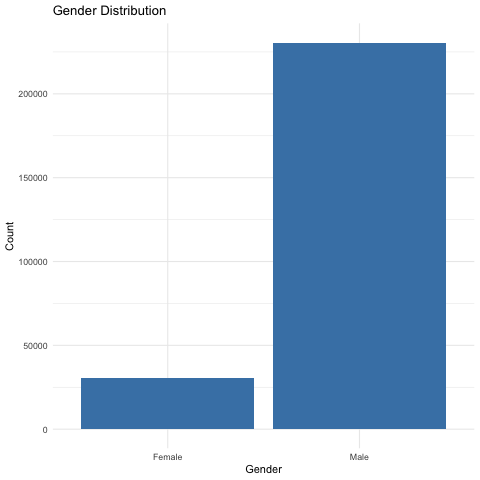

In [ ]:
%%R
gender_counts <- mental_health_data %>%
  count(Gender) %>%
  mutate(Percent = round(n / sum(n) * 100, 1))

print(gender_counts)

ggplot(gender_counts, aes(x = Gender, y = n)) +
  geom_col(fill = "steelblue") +
  labs(title = "Gender Distribution",
       x = "Gender", y = "Count") +
  theme_minimal()

### Days Indoors

         DaysIndoors     n Percent
1   Go out Every day 52408    20.1
2          1-14 days 57598    22.0
3         15-30 days 47074    18.0
4         31-60 days 54992    21.0
5 More than 2 months 49256    18.8


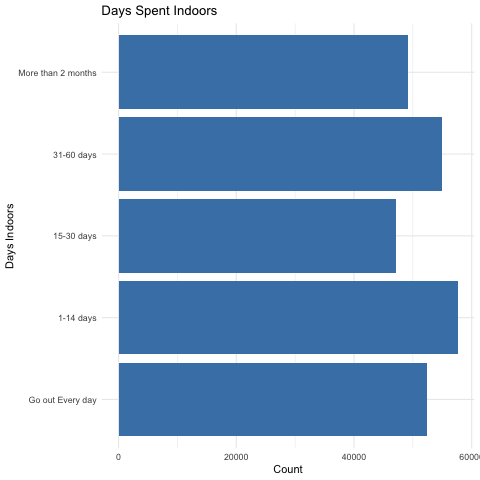

In [ ]:
%%R
days_counts <- mental_health_data %>%
  count(DaysIndoors) %>%
  mutate(Percent = round(n / sum(n) * 100, 1))

print(days_counts)

ggplot(days_counts, aes(x = DaysIndoors, y = n)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Days Spent Indoors",
       x = "Days Indoors", y = "Count") +
  theme_minimal()


### Mood Swings

  MoodSwings     n Percent
1        Low 89193    34.1
2     Medium 90215    34.5
3       High 81920    31.3


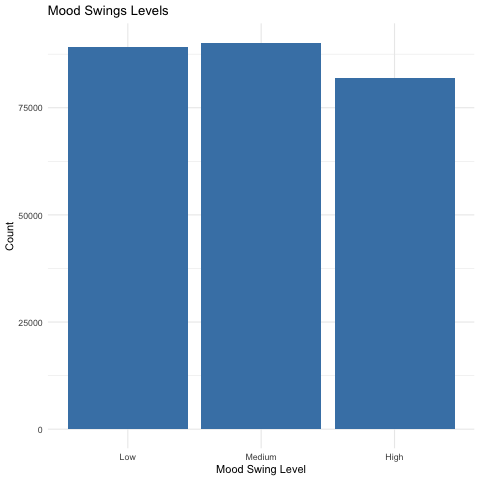

In [ ]:
%%R
mood_counts <- mental_health_data %>%
  count(MoodSwings) %>%
  mutate(Percent = round(n / sum(n) * 100, 1))

print(mood_counts)

ggplot(mood_counts, aes(x = MoodSwings, y = n)) +
  geom_col(fill = "steelblue") +
  labs(title = "Mood Swings Levels",
       x = "Mood Swing Level", y = "Count") +
  theme_minimal()


### Mental Health Treament

  Treatment      n Percent
1        No 132958    50.9
2       Yes 128370    49.1


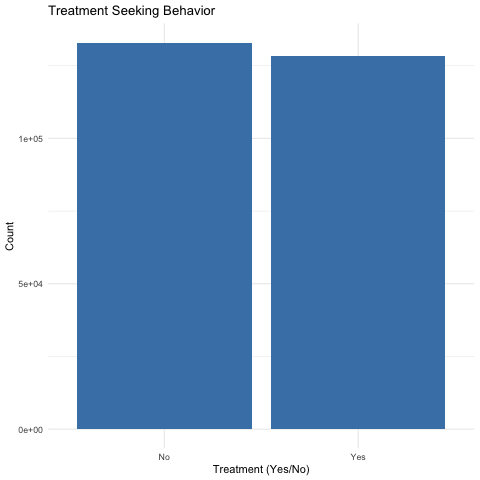

In [ ]:
%%R
treat_counts <- mental_health_data %>%
  count(Treatment) %>%
  mutate(Percent = round(n / sum(n) * 100, 1))

print(treat_counts)

ggplot(treat_counts, aes(x = Treatment, y = n)) +
  geom_col(fill = "steelblue") +
  labs(title = "Treatment Seeking Behavior",
       x = "Treatment (Yes/No)", y = "Count") +
  theme_minimal()


## Bivariate Analysis - Relationships

### Treatment vs Family History

     
          No    Yes
  No  105367  56614
  Yes  27591  71756

	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl_fh_treat
X-squared = 34236, df = 1, p-value < 2.2e-16



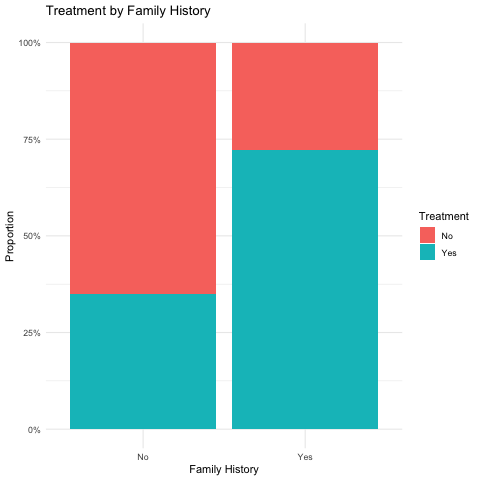

In [ ]:
%%R
tbl_fh_treat <- table(mental_health_data$FamilyHistory,
                      mental_health_data$Treatment)
print(tbl_fh_treat)
print(chisq.test(tbl_fh_treat))

ggplot(mental_health_data, aes(x = FamilyHistory, fill = Treatment)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = percent_format()) +
  labs(title = "Treatment by Family History",
       x = "Family History", y = "Proportion") +
  theme_minimal()

### Treatment vs Gender

        
             No    Yes
  Female   9406  21308
  Male   123552 107062

	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl_gender_treat
X-squared = 5711.6, df = 1, p-value < 2.2e-16



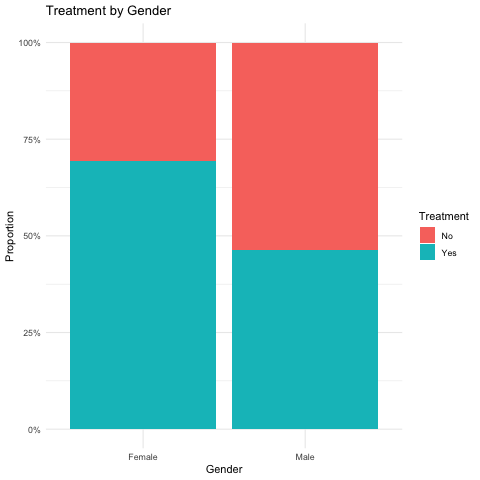

In [ ]:
%%R
tbl_gender_treat <- table(mental_health_data$Gender,
                          mental_health_data$Treatment)
print(tbl_gender_treat)
print(chisq.test(tbl_gender_treat))

ggplot(mental_health_data, aes(x = Gender, fill = Treatment)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = percent_format()) +
  labs(title = "Treatment by Gender",
       x = "Gender", y = "Proportion") +
  theme_minimal()

### Mood Swings vs Increasing Stress

        
         Maybe    No   Yes
  Low    32099 28440 28654
  Medium 29634 26421 34160
  High   28964 27347 25609

	Pearson's Chi-squared test

data:  tbl_mood_stress
X-squared = 1049.3, df = 4, p-value < 2.2e-16



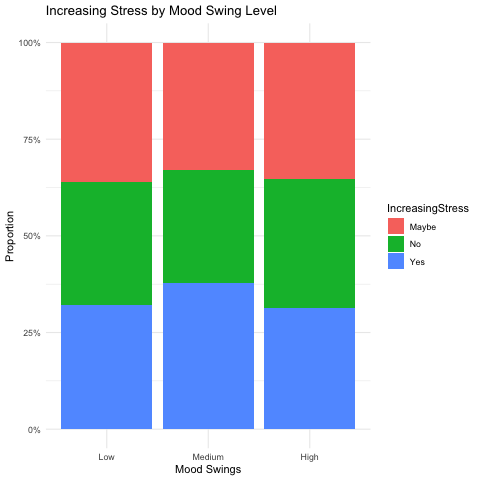

In [ ]:
%%R
tbl_mood_stress <- table(mental_health_data$MoodSwings,
                         mental_health_data$IncreasingStress)
print(tbl_mood_stress)
print(chisq.test(tbl_mood_stress))

ggplot(mental_health_data, aes(x = MoodSwings, fill = IncreasingStress)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = percent_format()) +
  labs(title = "Increasing Stress by Mood Swing Level",
       x = "Mood Swings", y = "Proportion") +
  theme_minimal()


### Days Indoors vs Mood Swings

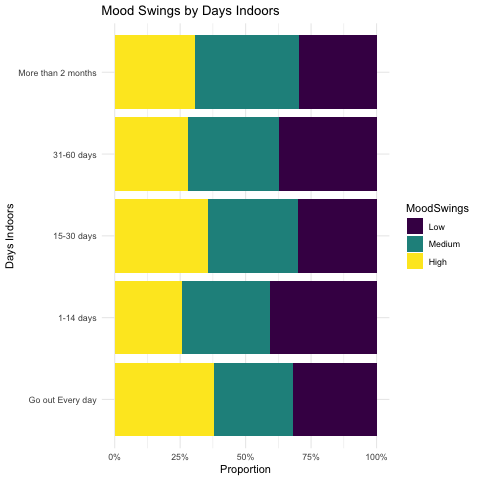

In [ ]:
%%R
ggplot(mental_health_data,
       aes(x = DaysIndoors, fill = MoodSwings)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = percent_format()) +
  labs(title = "Mood Swings by Days Indoors",
       x = "Days Indoors", y = "Proportion") +
  theme_minimal() +
  coord_flip()


## Outlier and Data Quality Checks

### Frequency of each factor value

In [ ]:
%%R
summary(mental_health_data)

    Gender              Country           Occupation    SelfEmployed
 Female: 30714   USA        :154478   Business :43990   No :234760  
 Male  :230614   UK         : 47878   Corporate:55622   Yes: 26568  
                 Canada     : 14177   Housewife:60081               
                 Netherlands:  5639   Others   :47428               
                 Ireland    :  5128   Student  :54207               
                 Germany    :  4615                                 
                 (Other)    : 29413                                 
 FamilyHistory Treatment                DaysIndoors    HabitsChange 
 No :161981    No :132958   Go out Every day  :52408   Maybe:85081  
 Yes: 99347    Yes:128370   1-14 days         :57598   No   :78560  
                            15-30 days        :47074   Yes  :97687  
                            31-60 days        :54992                
                            More than 2 months:49256                
                                  

### Check for remaining NA values

In [ ]:
%%R
colSums(is.na(mental_health_data))

               Gender               Country            Occupation 
                    0                     0                     0 
         SelfEmployed         FamilyHistory             Treatment 
                    0                     0                     0 
          DaysIndoors          HabitsChange   MentalHealthHistory 
                    0                     0                     0 
     IncreasingStress            MoodSwings        SocialWeakness 
                    0                     0                     0 
      CopingStruggles          WorkInterest MentalHealthInterview 
                    0                     0                     0 
          CareOptions 
                    0 


### Check duplicates

In [ ]:
%%R
sum(duplicated(mental_health_data))

[1] 178174
